In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,BatchNormalization,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [25]:
train=pd.read_csv('../LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,pixel_41,pixel_42,pixel_43,pixel_44,pixel_45,pixel_46,pixel_47,pixel_48,pixel_49,pixel_50,pixel_51,pixel_52,pixel_53,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,...,pixel_3013,pixel_3014,pixel_3015,pixel_3016,pixel_3017,pixel_3018,pixel_3019,pixel_3020,pixel_3021,pixel_3022,pixel_3023,pixel_3024,pixel_3025,pixel_3026,pixel_3027,pixel_3028,pixel_3029,pixel_3030,pixel_3031,pixel_3032,pixel_3033,pixel_3034,pixel_3035,pixel_3036,pixel_3037,pixel_3038,pixel_3039,pixel_3040,pixel_3041,pixel_3042,pixel_3043,pixel_3044,pixel_3045,pixel_3046,pixel_3047,pixel_3048,pixel_3049,pixel_3050,pixel_3051,pixel_3052,pixel_3053,pixel_3054,pixel_3055,pixel_3056,pixel_3057,pixel_3058,pixel_3059,pixel_3060,pixel_3061,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,54,42,98,73,52,119,91,63,139,107,75,145,110,80,149,117,89,149,120,93,131,103,77,125,99,76,142,115,91,144,112,86,137,105,79,129,97,71,137,106,79,134,106,76,124,97,64,139,113,78,...,127,94,161,123,92,153,114,84,159,120,90,162,124,93,149,116,91,140,104,83,148,103,77,161,105,69,144,95,55,112,90,59,119,91,58,130,96,65,120,87,59,92,67,46,103,78,57,170,140,104,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,101,99,125,131,139,155,166,180,172,190,210,180,199,214,142,156,156,111,120,110,106,107,98,109,104,102,123,121,117,127,129,127,181,188,189,217,226,229,209,211,211,166,167,162,164,165,156,158,160,148,...,63,62,27,31,30,18,21,20,17,20,21,25,34,42,29,37,48,16,20,28,5,6,11,6,6,11,10,9,12,25,22,22,51,45,42,68,64,67,90,90,101,116,113,122,134,127,133,140,130,136,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,252,253,254,253,254,245,242,244,226,224,224,244,242,241,241,236,233,...,91,86,75,89,85,78,92,91,80,94,94,81,95,95,80,94,94,79,92,92,76,90,90,72,86,86,64,78,78,64,78,78,69,83,83,66,80,80,55,69,69,52,66,66,58,72,72,68,80,79,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,37,23,44,39,25,40,37,22,40,38,23,24,23,9,32,25,15,43,27,19,30,20,10,32,30,17,41,37,23,52,48,34,67,63,50,50,46,32,44,35,25,43,35,25,38,29,20,38,30,20,...,85,58,99,83,57,106,87,62,119,98,74,104,88,62,104,85,58,106,85,55,122,99,67,107,85,54,112,96,66,92,81,53,80,62,39,96,78,59,77,67,42,85,76,44,84,75,48,67,57,38,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,193,211,181,196,218,177,195,220,181,195,223,184,192,223,189,190,223,189,189,222,188,193,224,183,194,223,182,194,223,184,191,222,184,190,227,180,185,226,177,187,223,177,188,223,177,188,223,176,187,222,...,92,96,89,94,98,91,96,99,92,97,101,93,98,102,94,99,102,92,97,101,93,98,102,90,95,99,88,93,97,83,89,92,77,87,88,75,84,85,71,81,82,74,80,83,72,76,79,71,75,78,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,173,203,153,173,201,153,172,201,157,177,205,161,180,210,161,180,212,161,180,212,162,181,213,165,184,216,164,183,215,163,182,214,162,181,213,162,181,213,160,179,211,157,176,208,161,180,212,16

In [26]:
x_train=train.drop(['label'],axis=1).values
x_train.shape

(50000, 3072)

In [27]:
x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32') / 255

In [28]:
y_train=train['label']
y_train

0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, Length: 50000, dtype: int64

In [29]:
test=pd.read_csv('../LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,pixel_41,pixel_42,pixel_43,pixel_44,pixel_45,pixel_46,pixel_47,pixel_48,pixel_49,pixel_50,pixel_51,pixel_52,pixel_53,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,...,pixel_3013,pixel_3014,pixel_3015,pixel_3016,pixel_3017,pixel_3018,pixel_3019,pixel_3020,pixel_3021,pixel_3022,pixel_3023,pixel_3024,pixel_3025,pixel_3026,pixel_3027,pixel_3028,pixel_3029,pixel_3030,pixel_3031,pixel_3032,pixel_3033,pixel_3034,pixel_3035,pixel_3036,pixel_3037,pixel_3038,pixel_3039,pixel_3040,pixel_3041,pixel_3042,pixel_3043,pixel_3044,pixel_3045,pixel_3046,pixel_3047,pixel_3048,pixel_3049,pixel_3050,pixel_3051,pixel_3052,pixel_3053,pixel_3054,pixel_3055,pixel_3056,pixel_3057,pixel_3058,pixel_3059,pixel_3060,pixel_3061,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,118,53,160,112,46,156,109,41,162,115,47,159,113,45,158,111,44,159,113,41,161,116,41,160,111,52,161,111,49,166,117,41,169,117,45,170,119,44,167,117,40,162,113,38,160,111,39,160,112,43,...,69,104,29,73,108,19,63,98,18,58,89,32,70,100,47,87,118,61,104,137,74,119,152,66,111,145,53,96,131,52,95,130,45,87,123,67,109,145,89,131,167,105,146,182,89,135,175,48,99,145,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,232,233,233,231,233,232,231,233,231,233,233,230,233,232,...,67,45,68,71,48,81,84,59,104,96,74,116,103,83,127,109,92,133,116,97,127,121,97,127,127,107,118,124,106,114,125,108,122,131,117,129,136,123,136,145,133,141,152,141,149,162,153,158,171,163,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,158,186,166,193,222,182,208,236,187,211,238,193,216,241,199,219,243,205,221,245,209,222,244,206,218,235,218,229,240,223,232,241,227,235,242,230,237,245,213,220,227,226,233,240,231,238,245,235,239,248,...,40,45,24,34,39,15,26,30,12,17,20,8,8,11,19,27,33,45,63,72,32,44,54,25,33,44,27,34,45,27,34,45,28,35,46,24,35,44,21,34,44,20,34,43,34,44,52,25,31,37,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,192,205,177,185,202,166,171,183,168,173,181,166,173,180,170,175,182,179,179,189,187,182,193,187,184,192,187,185,192,187,184,192,184,182,189,184,181,189,182,179,186,180,179,185,184,183,189,186,185,192,...,71,64,73,71,62,72,70,60,70,69,57,73,72,60,74,72,62,75,73,64,75,74,64,75,73,64,64,63,53,64,63,52,62,68,55,65,90,70,86,128,103,88,128,105,64,88,72,57,66,53,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,46,30,23,33,22,40,57,36,44,75,55,45,80,57,45,83,59,40,70,54,10,20,12,15,34,18,44,71,43,53,75,44,51,70,49,48,66,50,65,87,58,90,120,77,93,124,81,91,121,77,...,218,170,183,210,152,165,196,136,186,206,156,207,214,166,170,180,121,107,124,69,86,113,74,66,86,47,85,102,71,112,132,102,140,160,127,169,186,156,149,167,139,137,167,131,137,167,130,150,180,147,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,81,130,75,80,131,76,81,134,76,81,136,76,82,136,76,83,137,78,85,141,81,88,142,81,87,140,81,86,141,80,85,141,79,84,139,81,8

In [30]:
x_test=test.drop(['label'],axis=1).values
x_test=x_test.reshape((10000,32,32,3)).astype('float32')/255
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [31]:
y_test=test['label']
y_test

0       3
1       8
2       8
3       0
4       6
       ..
9995    8
9996    3
9997    5
9998    1
9999    7
Name: label, Length: 10000, dtype: int64

In [32]:
model=Sequential([
    Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

In [33]:
history=model.fit(x_train,y_train,epochs=11,validation_split=0.2,batch_size=64)

Epoch 1/11
625/625 [==============================] - 47s 74ms/step - loss: 1.7053 - accuracy: 0.3744 - val_loss: 2.0962 - val_accuracy: 0.2582
Epoch 2/11
625/625 [==============================] - 54s 86ms/step - loss: 1.3303 - accuracy: 0.5242 - val_loss: 1.2698 - val_accuracy: 0.5574
Epoch 3/11
625/625 [==============================] - 51s 82ms/step - loss: 1.1253 - accuracy: 0.6028 - val_loss: 1.0762 - val_accuracy: 0.6183
Epoch 4/11
625/625 [==============================] - 54s 86ms/step - loss: 1.0002 - accuracy: 0.6480 - val_loss: 1.0308 - val_accuracy: 0.6431
Epoch 5/11
625/625 [==============================] - 64s 103ms/step - loss: 0.9037 - accuracy: 0.6774 - val_loss: 1.0400 - val_accuracy: 0.6345
Epoch 6/11
625/625 [==============================] - 68s 109ms/step - loss: 0.8141 - accuracy: 0.7107 - val_loss: 0.9986 - val_accuracy: 0.6606
Epoch 7/11
625/625 [==============================] - 73s 117ms/step - loss: 0.7298 - accuracy: 0.7391 - val_loss: 1.0282 - val_accura

In [34]:
los,acc=model.evaluate(x_test,y_test)
print(acc)

313/313 [==============================] - 5s 15ms/step - loss: 1.2118 - accuracy: 0.6445
0.6445000171661377


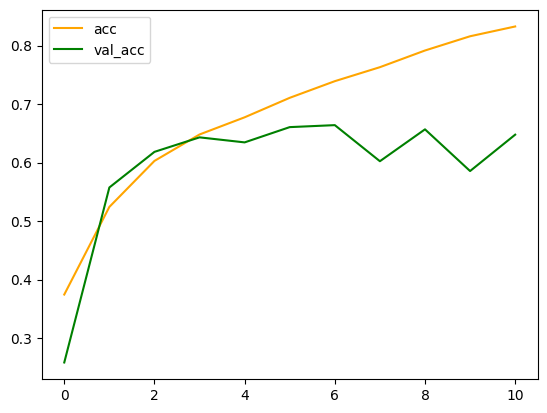

In [35]:
mat.plot(history.history['accuracy'],label='acc',color='orange')
mat.plot(history.history['val_accuracy'],label='val_acc',color='green')
mat.legend()
mat.show()

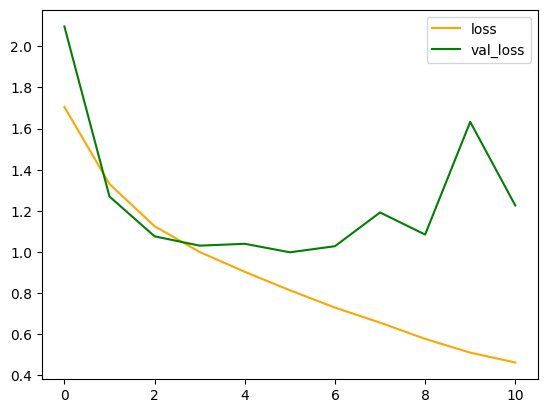

In [36]:
mat.plot(history.history['loss'],label='loss',color='orange')
mat.plot(history.history['val_loss'],label='val_loss',color='green')
mat.legend()
mat.show()

In [37]:
n=123
pred=model.predict(x_test)
print(y_test[n])
print(np.argmax(pred[n]))

313/313 [==============================] - 4s 13ms/step
2
2
